### Politeness features and Markers in Convokit

This notebook demonstrates how to get politeness features and markers of a  corpus.

In [1]:
import convokit
print(convokit.__file__)

### 1. Loading and parsing dataset

The code below downloads the corpus and obtains the dependency parses for each utterance.

In [2]:
from convokit import Corpus, User, Utterance
from convokit import download
corpus = Corpus(download("wiki-corpus"), utterance_end_index=4000)
                

In [3]:
from convokit import TextParser
parser = TextParser(verbosity=1000)
corpus = parser.transform(corpus)

1000/4001 utterances processed
2000/4001 utterances processed
3000/4001 utterances processed
4000/4001 utterances processed
4001/4001 utterances processed


### 2. Politeness Features and Markers

Here we add the politeness strategy information.

In [4]:
from convokit import PolitenessStrategies
ps = PolitenessStrategies()
corpus = ps.transform(corpus, markers=True)

Below is an example of politeness strategy data. For each positive occurance, we print out the markers, which are in the form of `[token, sentence index, sentence position]`.

In [5]:
utt = corpus.get_utterance('480633')
print("RAW TEXT: " + utt.text + "\n")

print("Sentences: ")
for i, x in enumerate(utt.meta["parsed"]):
    stra = ""
    for y in x["toks"]:
        stra += " " + y["tok"]
    
    print(str(i) + " " + stra[:50] + "...") 
    
print()
for ((k,v),(k1,v2)) in zip(utt.meta["politeness_strategies"].items(),utt.meta["politeness_markers"].items()):
    if v != 0:
        print(k[21:len(k)-2] + " results:")
        print("Markers: " + str(v2) + "\n")

RAW TEXT: Hi JaGa. I am always puzzled as to why you ask me to do work which you are as capable of doing yourself as I am. We have spoken about this before. Wikipedia is a volunteer charity project, and people do their best in the time they have available to them, and people will tend to work initially in areas that interest them, and then help out on tedious tasks if they have the time or inclination - but nobody is compelled to do anything (well, other than to take care they are not doing harm). That particular splitting you are talking about was a long and complex one that nobody had done for more than two years because of the amount of work involved. Sending people a nag message at the end of it instead of pitching in and helping out yourself is not conducive to the spirit of support, co-operation and collaboration that embodies the spirit of Wikipedia that I respect and enjoy so much. If you spot a spelling mistake - fix it yourself instead of sending someone a message. If you see

We can get a basic overview of the corpus using `summarize()`:

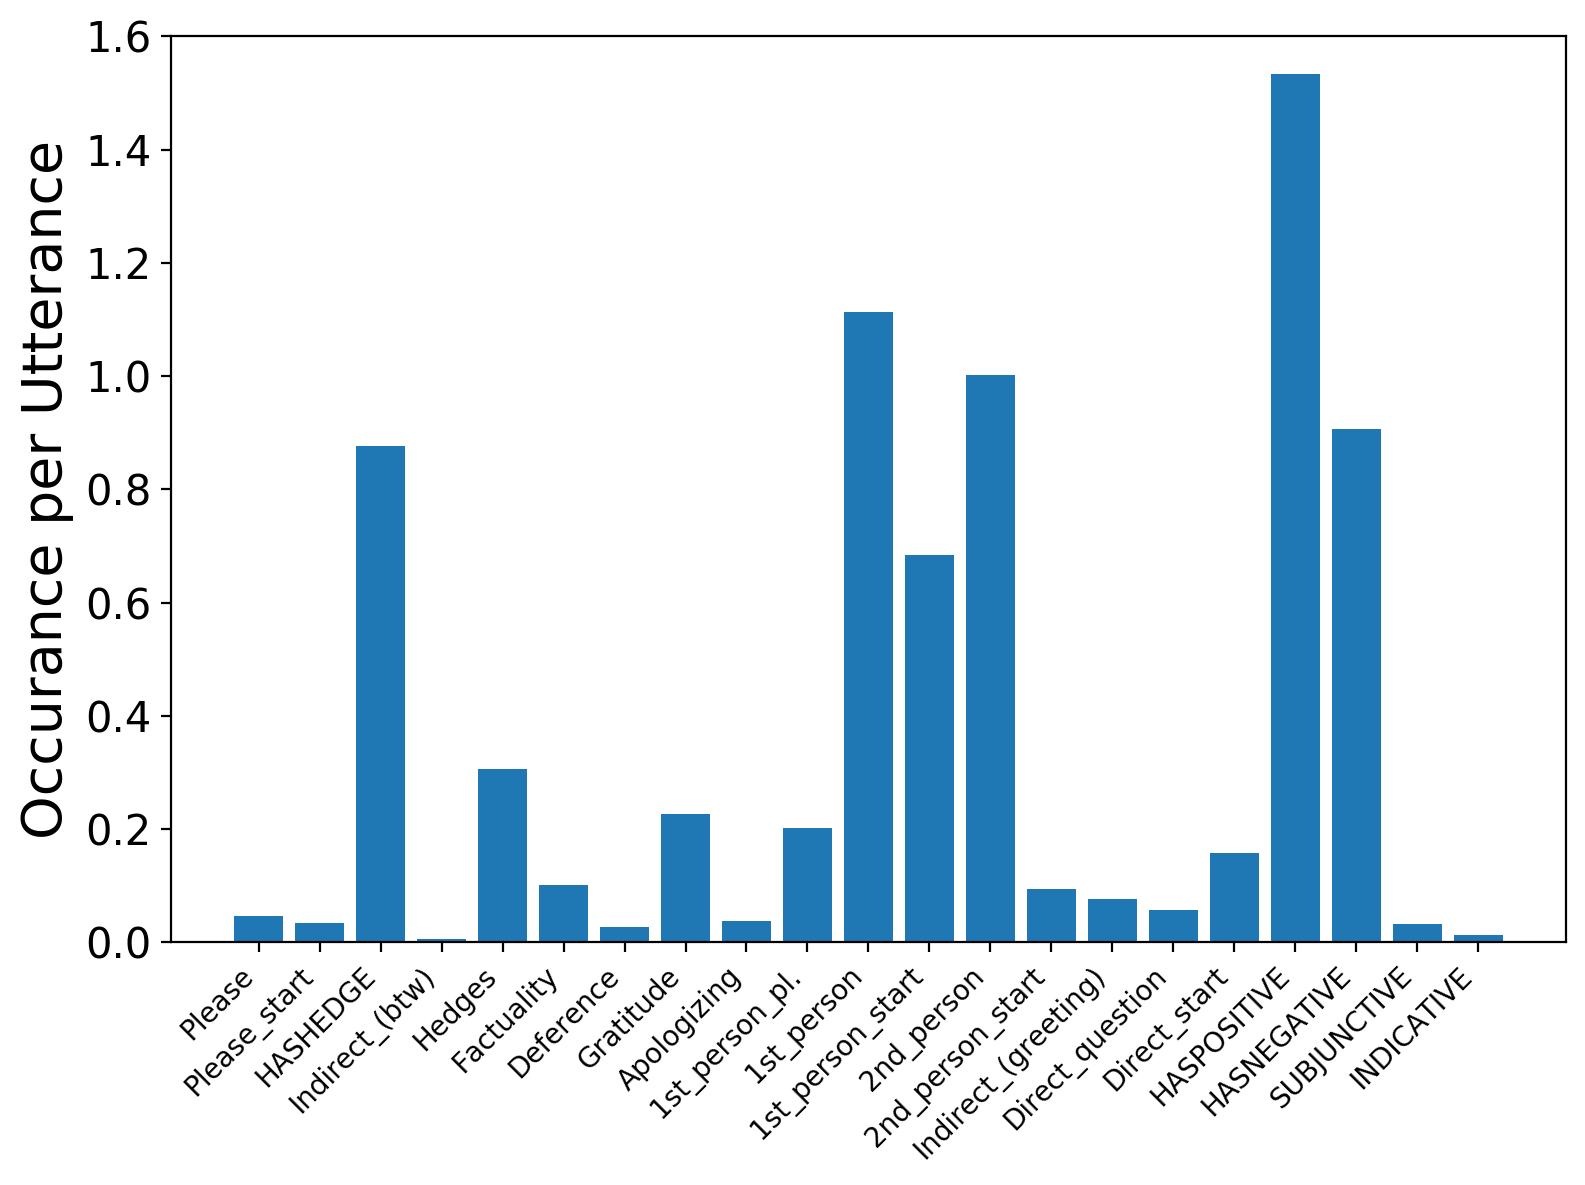

In [6]:
data = ps.summarize(corpus, plot=True, y_lim = 1.6)

`Summarize()` can also be used to look a specific subsets of the dataset.

Queries are lambda functions which take in utterance metadata (utt.meta), and output true or false. `Summarize()` will use all utterances which pass the query.

In this example, summarize() only looks at utterances from non-admins.

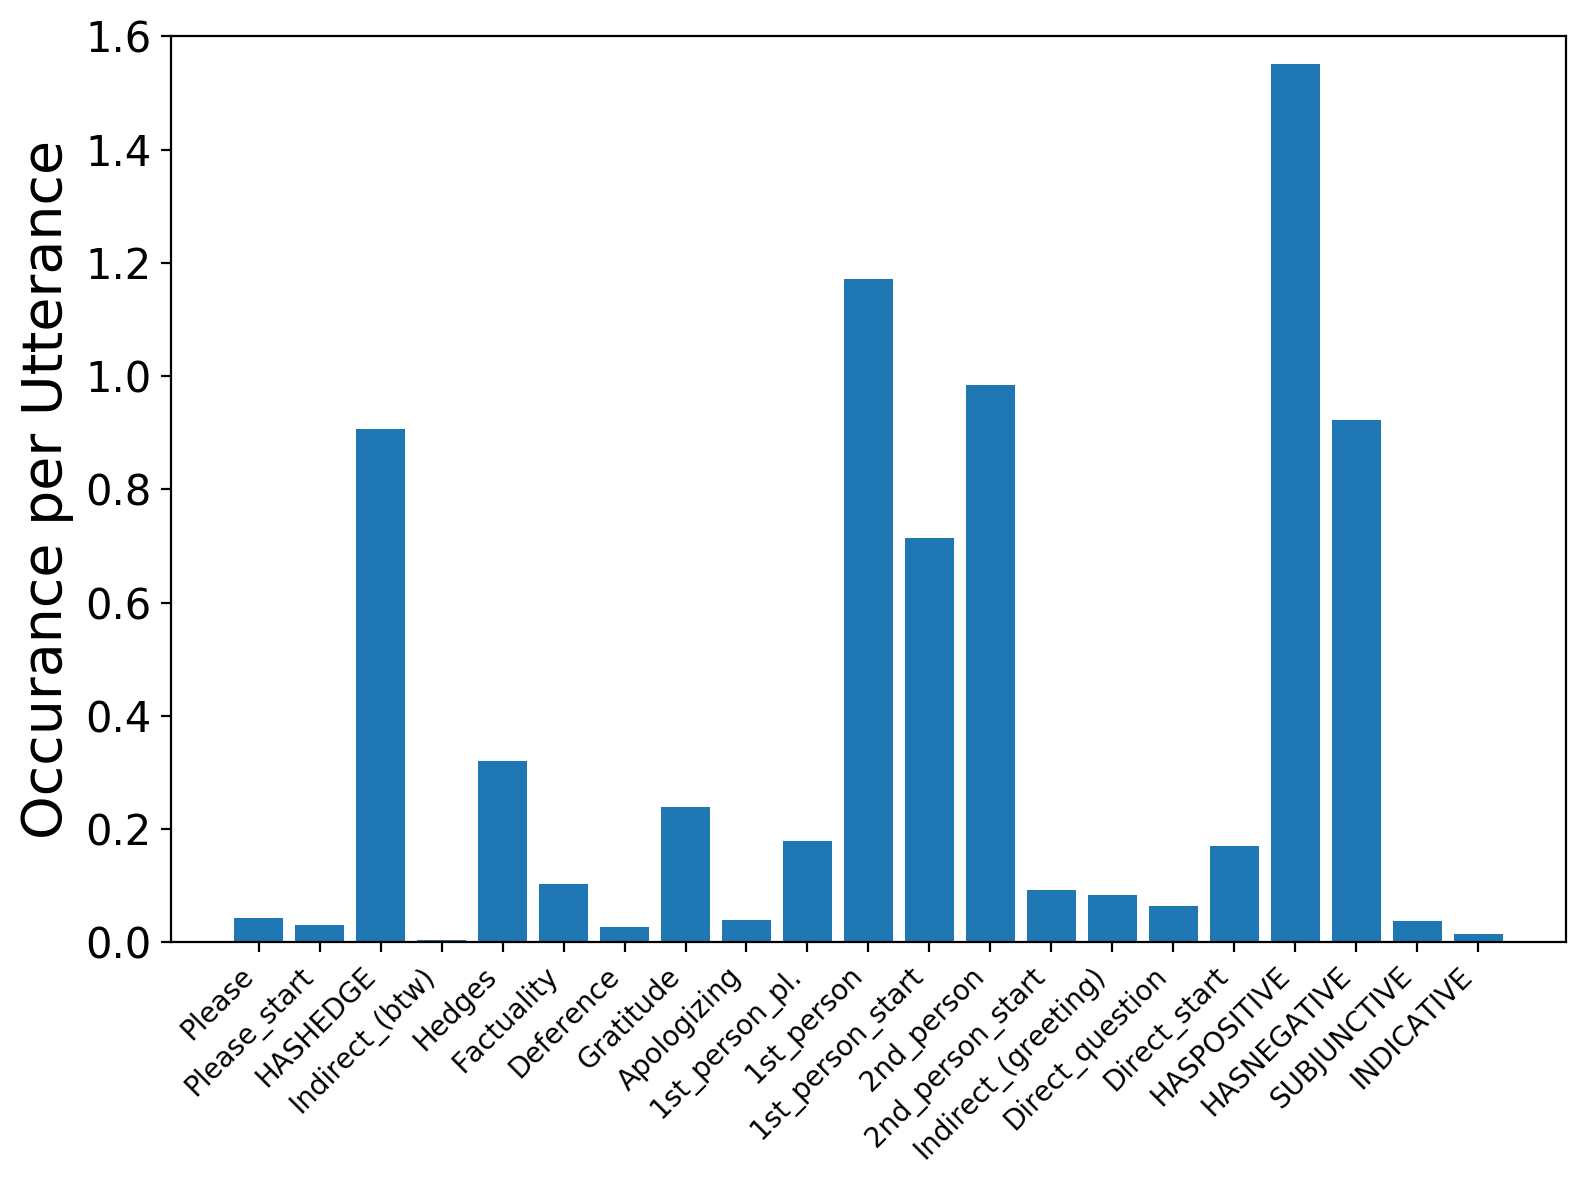

In [12]:
query = lambda x : not x["is-admin"]
non_admin_data = ps.summarize(corpus, query, plot = True, y_lim = 1.6)

Now we can get only admin data.

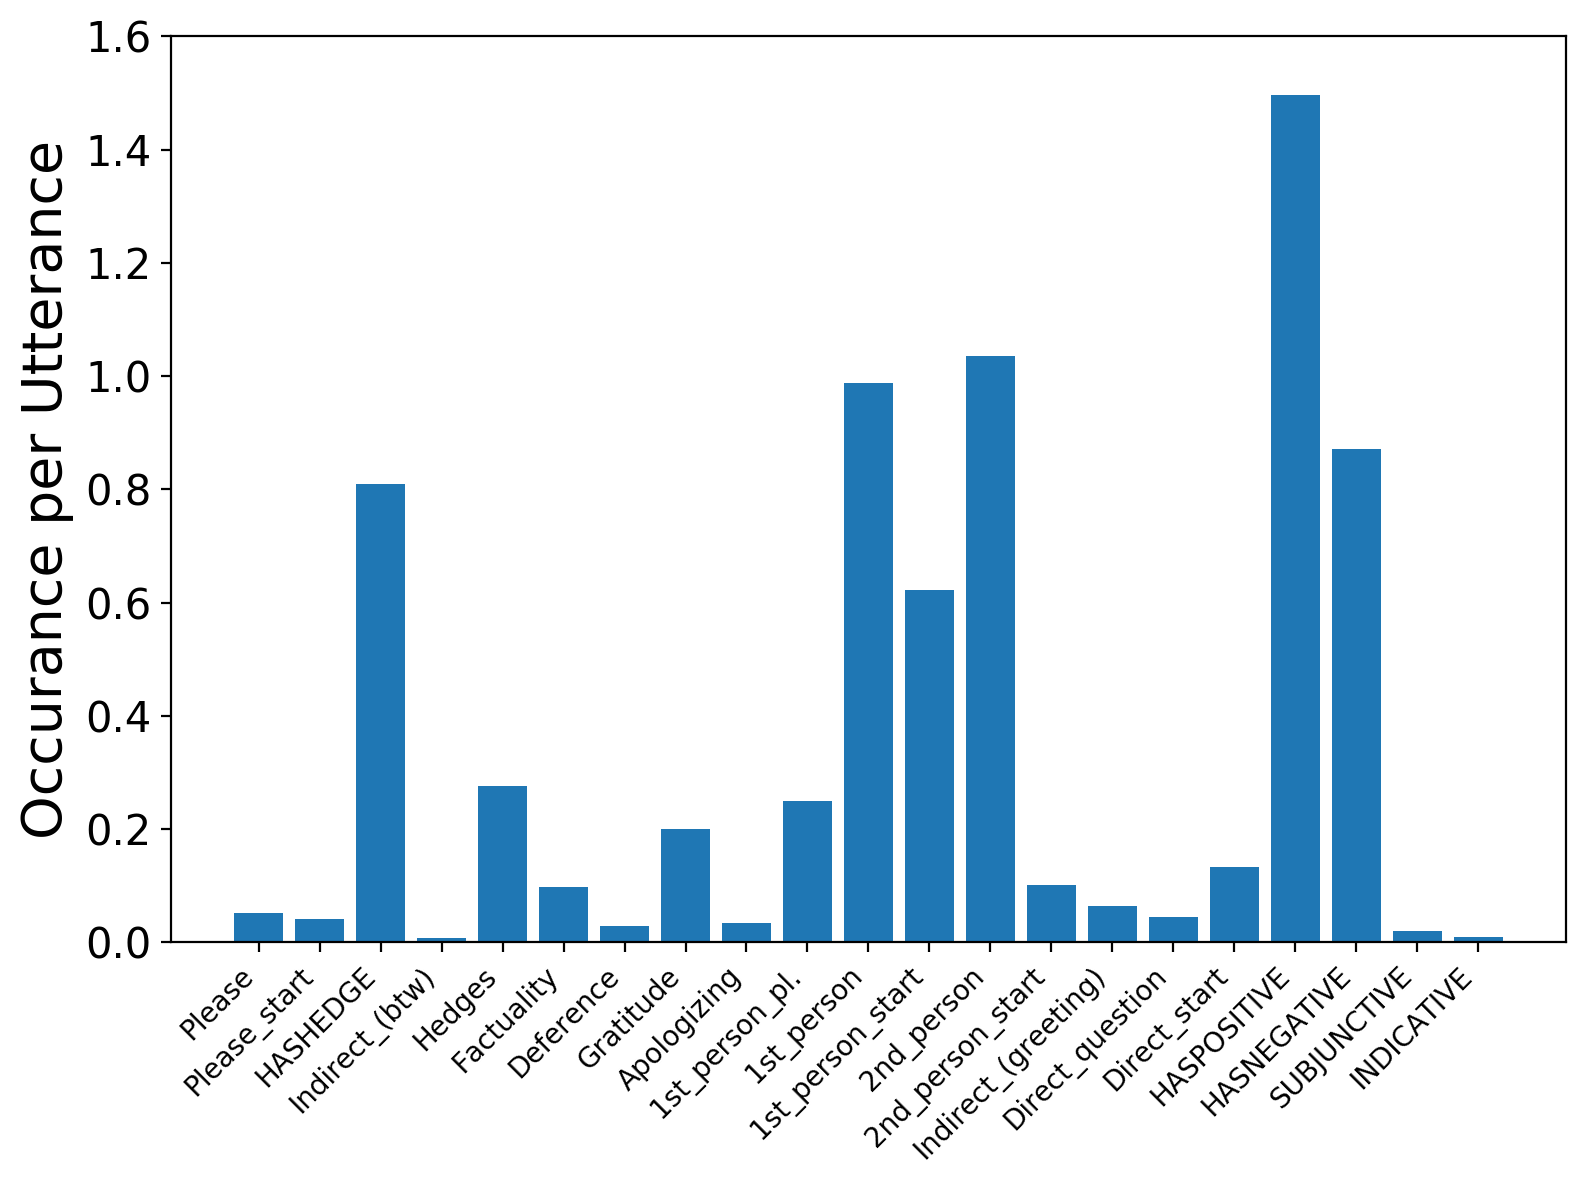

In [8]:
query = lambda x : x["is-admin"]
admin_data = ps.summarize(corpus, query, plot = True, y_lim = 1.6)

The occurance differences within admins and nonadmins is significant. As we can see, nonadmins are much more likely to use hedges and start their sentences with "I". Meanwhile, admins are more likely to use the words "We" and "you".

In [9]:
round(not_admin_data - admin_data, 2)

,Averages
Please,-0.01
Please_start,-0.01
HASHEDGE,0.10
Indirect_(btw),-0.00
Hedges,0.04
Factuality,0.01
Deference,-0.00
Gratitude,0.04
Apologizing,0.01
1st_person_pl.,-0.07
